In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.11.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
ch,row,col = train_images.shape
train_images = train_images.reshape(ch,row,col,1)
print(train_images.shape)

(60000, 28, 28, 1)


In [5]:
len(train_labels)

60000

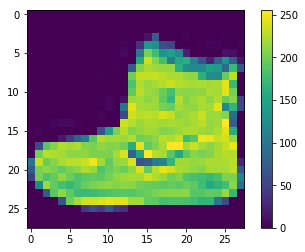

In [6]:
plt.figure()
plt.imshow(train_images[0].reshape(row,col))
plt.colorbar()
plt.grid(False)

In [7]:
train_images = train_images.astype("float32")/ 255.0

test_images = test_images.astype("float32") / 255.0

#valid_images = train_images[50000:]
#valid_labels = train_labels[50000:]
#print(valid_images.shape)
#print(len(valid_labels))

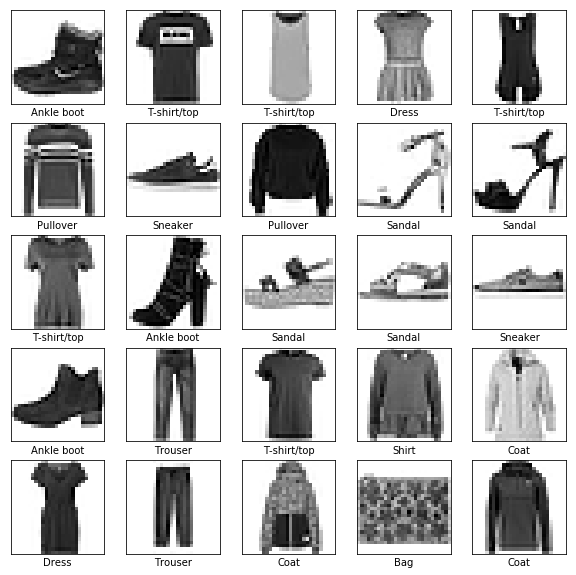

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(row,col), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [9]:

model = keras.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=2,padding="same",input_shape=(28,28,1)),
    keras.layers.LeakyReLU(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32,kernel_size=2,padding="same"),
    keras.layers.LeakyReLU(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

"""
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', 
                                 activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
"""
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
__________

In [10]:
model.compile(optimizer="adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images,
          train_labels,
          batch_size = 64,
          validation_split=0.2,
          epochs=5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 90us/step - loss: 0.3854 - acc: 0.8629 - val_loss: 0.3500 - val_acc: 0.8662
Epoch 2/5
48000/48000 [==============================] - 3s 63us/step - loss: 0.2590 - acc: 0.9048 - val_loss: 0.2740 - val_acc: 0.9029
Epoch 3/5
48000/48000 [==============================] - 3s 63us/step - loss: 0.2151 - acc: 0.9207 - val_loss: 0.2740 - val_acc: 0.9021
Epoch 4/5
48000/48000 [==============================] - 3s 64us/step - loss: 0.1861 - acc: 0.9317 - val_loss: 0.2448 - val_acc: 0.9125
Epoch 5/5
48000/48000 [==============================] - 3s 64us/step - loss: 0.1615 - acc: 0.9409 - val_loss: 0.2936 - val_acc: 0.9006


In [19]:
#print(test_images.shape)
test_images = test_images.reshape(10000,28,28,1)
score = model.evaluate(test_images,test_labels,verbose=0)
print(score[1])

0.893


(10000, 10)


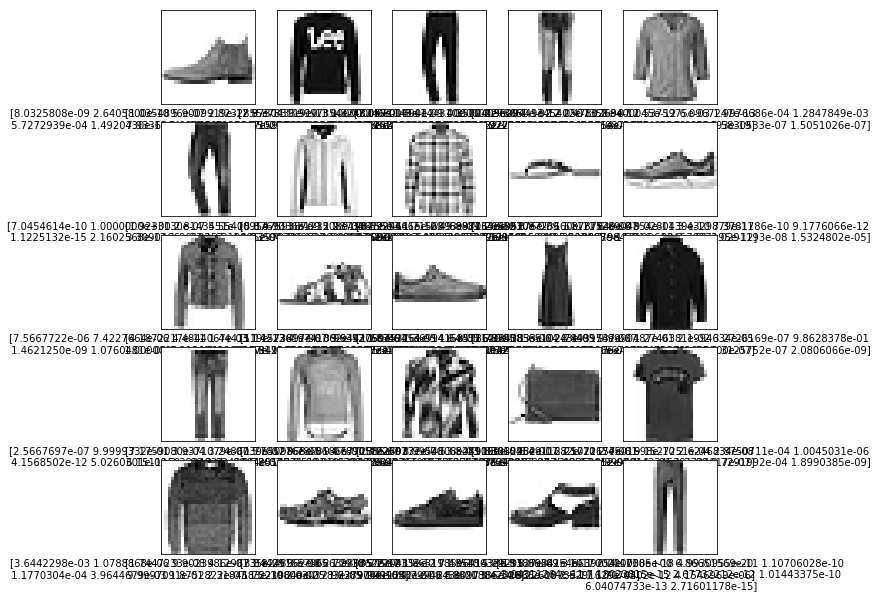

In [20]:
prediction = model.predict(test_images)
print(prediction.shape)
test_images = test_images.reshape(10000,28,28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(row,col), cmap=plt.cm.binary)
    plt.xlabel(prediction[i])